# Plane-Wave compounding example

After importing some pymus packages, we will load some setting for a simple plane-wave image formation example. 

In [1]:
import setup.pymus_us_dataset as pymus_us_dataset
import setup.pymus_scan_region as pymus_scan_region
import setup.pymus_us_probe as pymus_us_probe
import setup.pymus_us_sequence as pymus_sequence
import result.pymus_image as pymus_image
import processing.pymus_beamforming as pymus_beamforming
import tools.pymus_utils as pymus_utils
import numpy as np

nbPW = 3
pht="in_vitro_type1"

We load the scanning region, the probe and sequence settings

In [3]:
scan = pymus_scan_region.ScanRegion()
scf_name = pymus_utils.TO_DATA_TEST + "scan_region/linear_scan_region.hdf5"
scan.read_file(scf_name,"scan_region")
print(scan)

Scanning Region X = [-0.019050000000000008 ... 0.018996594982078844] (387 pts) / Z = [0.005 ... 0.04994623655913978] (609 pts)   


In [4]:
probe = pymus_us_probe.UsProbe()
prb_name = pymus_utils.TO_DATA_TEST + "probe/linear_probe.hdf5"
probe.read_file(prb_name,"probe")
print(probe)

Linear array probe - N_channels = 128  F_sampling = 20832000.0 - pitch = 0.00029999949038028717  Elmts = (3, 128) 


In [5]:
seq = pymus_sequence.UsPWSequence()
sqc_name = pymus_utils.TO_DATA_TEST + "sequence/sequence_nb_pw_%s.hdf5" % nbPW
seq.read_file(sqc_name,"sequence")
print(seq)

Us PW Sequence - N_angles = 3 init_time = 0.0 - prf = 100.0 mod_freq = 0.0 


Import the dataset (consisting of echo time series on each of the elements of the probe)

In [6]:
data = pymus_us_dataset.UsDataSet("dataset_%s_pw" % nbPW,probe,seq)
dst_name = pymus_utils.TO_DATA_TEST + "echo/%s_nb_pw_%s.hdf5" % (pht,nbPW) 
data.read_file(dst_name,pht)
print(data)

US dataset - dataset_3_pw 20171027  Linear array probe - N_channels = 128  F_sampling = 20832000.0 - pitch = 0.00029999949038028717  Elmts = (3, 128)  - Us PW Sequence - N_angles = 3 init_time = 0.0 - prf = 100.0 mod_freq = 0.0  - data -> (3, 128, 1536) 


Create a beamformer instance with no apodization seeting. 

In [8]:
beamformer = pymus_beamforming.BeamFormer(scan,probe,"none")

Form the image with a delay-and-sum beamforming algorithm

In [9]:
beamformer.beamform(seq,data.data)

INFO:root:Beamforming signal ... 
INFO:root: 		Angle = -0.00754737 
INFO:root: 		Angle = 0.0 
INFO:root: 		Angle = 0.00754737 


display the image

X -> -0.01905 0.0189965949821 Z -> 0.005 0.0499462365591 / 0.0449462365591 0.0380465949821 / 0.84649122807 


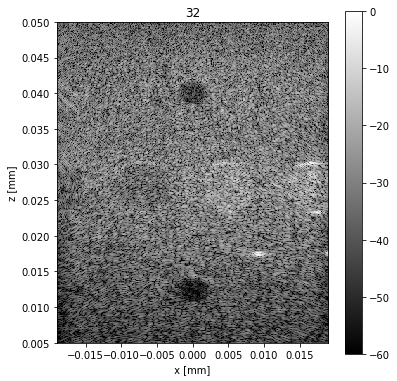

In [13]:
im_path = pymus_utils.TO_PYMUS + "experiment/output/image_%s_bf_%s_PW.hdf5" % (pht,nbPW) 
beamformer.write_image(im_path)
img = pymus_image.EchoImage(scan)
img.read_file(im_path,None)
img.show_image(dbScale=True,dynamic_range=60)